In [2]:
import pandas as pd
import numpy as np
!pip install geopy
from geopy.distance import geodesic
import geopandas as gpd
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')




In [3]:
data = Table().read_table('zipcodedata_geocodio2.csv')
data

ZIP,TOTAL POP,DIABETES,HEART DISEASE,POVERTY,FOOD INSECURITY,OBESE (BMI >=30),WHITE,ASIAN,BLACK,OTHER RACE,Latitude,Longitude
90001,42900,0.116,0.04,0.266,0.191,0.42,0.357,0.002,0.1,0.54,33.974,-118.248
90002,39700,0.117,0.041,0.285,0.219,0.418,0.359,0.007,0.247,0.387,33.9505,-118.246
90003,43200,0.115,0.04,0.3,0.219,0.414,0.27,0.003,0.244,0.483,33.9492,-118.273
90004,47600,0.1,0.053,0.181,0.097,0.287,0.408,0.274,0.044,0.274,34.0762,-118.311
90005,30400,0.09,0.048,0.245,0.142,0.237,0.198,0.371,0.055,0.376,34.0592,-118.307
90006,38100,0.12,0.05,0.0383,0.18,0.317,0.219,0.22,0.005,0.524,34.048,-118.294
90007,33300,0.077,0.034,0.403,0.138,0.257,0.32,0.232,0.104,0.344,34.0281,-118.285
90008,25300,0.111,0.054,0.198,0.099,0.346,0.148,0.38,0.701,0.113,34.0096,-118.347
90010,7800,0.079,0.054,0.163,0.062,0.294,0.19,0.689,0.059,0.063,34.0621,-118.316
90011,73500,0.114,0.038,0.325,0.239,0.442,0.361,0.007,0.098,0.534,34.0071,-118.259


In [4]:
tjs = Table().read_table('tjonly_geocodio.csv')
tjs

City,County,Address,Zip Code,Number,Latitude,Longitude
Los Angeles,Los Angeles,1000 Glendon Ave,90024,234,34.0622,-118.444
Los Angeles,Los Angeles,2738 Hyperion Ave,90027,17,34.1077,-118.272
Los Angeles,Los Angeles,1600 N Vine St,90028,206,34.1,-118.326
Los Angeles,Los Angeles,3456 S Sepulveda Blvd,90034,119,34.0202,-118.423
Los Angeles,Los Angeles,263 S La Brea Ave,90036,31,34.0692,-118.344
Los Angeles,Los Angeles,175 South Fairfax Ave,90036,240,34.072,-118.362
Eagle Rock,Los Angeles,1566 Colorado Blvd,90041,55,34.1394,-118.2
Westchester,Los Angeles,8645 S Sepulveda,90045,33,33.9586,-118.396
Los Angeles,Los Angeles,8000 W Sunset Blvd,90046,192,34.0978,-118.365
West Hollywood,Los Angeles,7310 Santa Monica Blvd,90046,40,34.0906,-118.349


In [5]:
mean_diabetes = np.mean(data.column("DIABETES"))
print(mean_diabetes)
mean_heart_disease = np.mean(data.column("HEART DISEASE"))
print(mean_heart_disease)
mean_food_insecurity = np.mean(data.column("FOOD INSECURITY"))
print(mean_food_insecurity)
mean_obesity = np.mean(data.column("OBESE (BMI >=30)"))
print(mean_obesity)
mean_black_prop = np.mean(data.column("BLACK"))
print(mean_black_prop)

0.2676180124223602
0.10512732919254658
0.13145341614906833
0.6157763975155279
0.12077422360248449


In [9]:
min_dist_to_tj = {}
mins_miles = []
zip_list = data.column('ZIP')
tj_zip_list = tjs.column('Zip Code')
for i in range(0, data.num_rows):
    if zip_list.item(i) in tj_zip_list:
        min_dist_to_tj[zip_list.item(i)] = 0
        mins_miles = np.append(mins_miles, 0)
        i += 1
    else:
        dist = []
        zip_to_measure = (data.column('Latitude').item(i), data.column('Longitude').item(i))
        j = 0
        for j in range(0, tjs.num_rows):
            tj_to_look_at = (tjs.column('Latitude').item(j), tjs.column('Longitude').item(j))
            point = geodesic(zip_to_measure, tj_to_look_at).miles
            dist = np.append(dist, point)
            j += 1
        mins_miles = np.append(mins_miles, min(dist))    
        min_dist_to_tj[zip_list.item(i)] = min(dist)
        i += 1
data = data.with_column('Min Distance to TJ', mins_miles)
data

ZIP,TOTAL POP,DIABETES,HEART DISEASE,POVERTY,FOOD INSECURITY,OBESE (BMI >=30),WHITE,ASIAN,BLACK,OTHER RACE,Latitude,Longitude,Min Distance to TJ
90001,42900,0.116,0.04,0.266,0.191,0.42,0.357,0.002,0.1,0.54,33.974,-118.248,4.15213
90002,39700,0.117,0.041,0.285,0.219,0.418,0.359,0.007,0.247,0.387,33.9505,-118.246,5.66426
90003,43200,0.115,0.04,0.3,0.219,0.414,0.27,0.003,0.244,0.483,33.9492,-118.273,5.34071
90004,47600,0.1,0.053,0.181,0.097,0.287,0.408,0.274,0.044,0.274,34.0762,-118.311,1.87266
90005,30400,0.09,0.048,0.245,0.142,0.237,0.198,0.371,0.055,0.376,34.0592,-118.307,2.25125
90006,38100,0.12,0.05,0.0383,0.18,0.317,0.219,0.22,0.005,0.524,34.048,-118.294,1.60999
90007,33300,0.077,0.034,0.403,0.138,0.257,0.32,0.232,0.104,0.344,34.0281,-118.285,0.143703
90008,25300,0.111,0.054,0.198,0.099,0.346,0.148,0.38,0.701,0.113,34.0096,-118.347,2.86853
90010,7800,0.079,0.054,0.163,0.062,0.294,0.19,0.689,0.059,0.063,34.0621,-118.316,1.69722
90011,73500,0.114,0.038,0.325,0.239,0.442,0.361,0.007,0.098,0.534,34.0071,-118.259,1.98525


The Correlation Coefficient, r, is 0.07513889668793029
The R Squared Value is 0.0048817718659690595


[0, 8, 0, 0.4]

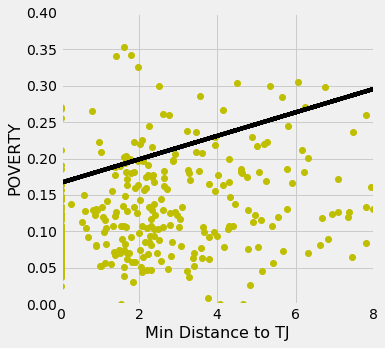

In [105]:
data.scatter("Min Distance to TJ", "POVERTY")
x = data.column("Min Distance to TJ")
poverty_y = data.column("POVERTY")
coef_pov = np.polyfit(x, poverty_y, 1)
poly1d_fn_pov = np.poly1d(coef_pov)
plots.plot(x, poverty_y, 'yo', x, poly1d_fn_pov(x), '--k')
matrix_pov = np.corrcoef(x, poverty_y)
corr_xy_pov = matrix_pov[0, 1]
print("The Correlation Coefficient, r, is", corr_xy_pov)
r_squared_pov = corr_xy ** 2
print("The R Squared Value is", r_squared_pov)
plots.axis([0, 8, 0, .4])

The Correlation Coefficient, r, is 0.08970606925933497
The R Squared Value is 0.008047178861960602


[0, 8, 0, 0.5]

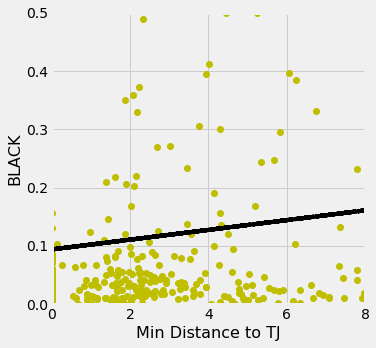

In [106]:
data.scatter("Min Distance to TJ", "BLACK")
x = data.column("Min Distance to TJ")
black_y = data.column("BLACK")
coef_black = np.polyfit(x, black_y, 1)
poly1d_fn_black = np.poly1d(coef_black)
plots.plot(x, black_y, 'yo', x, poly1d_fn_black(x), '--k')
matrix_black = np.corrcoef(x, black_y)
corr_xy_black = matrix_black[0, 1]
print("The Correlation Coefficient, r, is", corr_xy_black)
r_squared_black = corr_xy_black ** 2
print("The R Squared Value is", r_squared_black)
plots.axis([0, 8, 0, .5])

The Correlation Coefficient, r, is 0.07798018137924093
The R Squared Value is 0.0060809086879393135


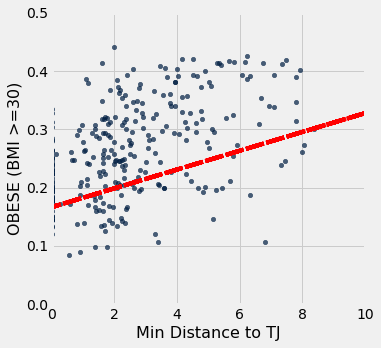

In [107]:
data.scatter("Min Distance to TJ", "OBESE (BMI >=30)")
obese_y = data.column("OBESE (BMI >=30)")
coef_obese = np.polyfit(x, obese_y, 2)
poly1d_fn_obese = np.poly1d(coef)


#here I was thinking I could potentially model
plots.plot(x, poly1d_fn_obese(x), c='r', linestyle = '--')
plots.axis([0, 10, 0, .5])
matrix_obese = np.corrcoef(x, obese_y)
corr_xy_obese = matrix_obese[0, 1]
print("The Correlation Coefficient, r, is", corr_xy_obese)
r_squared_obese = corr_xy_obese ** 2
print("The R Squared Value is", r_squared_obese)


The Correlation Coefficient, r, is 0.06986967772910549
The R Squared Value is 0.0048817718659690595


[0, 8, 0, 3]

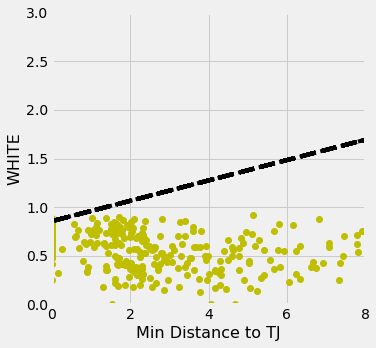

In [108]:
data.scatter("Min Distance to TJ", "WHITE")
white_y = data.column("WHITE")
coef_white = np.polyfit(x, white_y, 1)
poly1d_fn_white = np.poly1d(coef_white)
plots.plot(x, white_y, 'yo', x, poly1d_fn_white(x), '--k')
matrix_white = np.corrcoef(x, white_y)
corr_xy_white = matrix_white[0, 1]
print("The Correlation Coefficient, r, is", corr_xy_white)
r_squared_white = corr_xy_white ** 2
print("The R Squared Value is", r_squared_white)
plots.axis([0, 8, 0, 3])

The Correlation Coefficient, r, is 0.051024223905068465
The R Squared Value is 0.0026034714251145603


[0, 8, 0, 0.25]

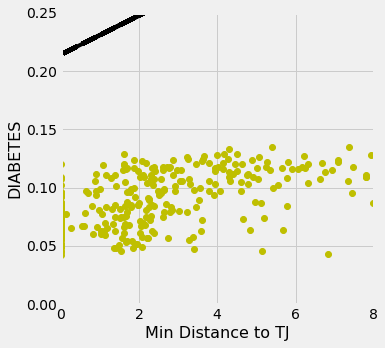

In [112]:
data.scatter("Min Distance to TJ", "DIABETES")
diabetes_y = data.column("DIABETES")
coef_diabetes = np.polyfit(x, diabetes_y, 1)
poly1d_fn_diabetes = np.poly1d(coef_diabetes)
plots.plot(x, diabetes_y, 'yo', x, poly1d_fn_diabetes(x), '--k')
matrix_diabetes = np.corrcoef(x, diabetes_y)
corr_xy_diabetes = matrix_diabetes[0, 1]
print("The Correlation Coefficient, r, is", corr_xy_diabetes)
r_squared_diabetes = corr_xy_diabetes ** 2
print("The R Squared Value is", r_squared_diabetes)
plots.axis([0, 8, 0, .25])

The Correlation Coefficient, r, is 0.06605589986898756
The R Squared Value is 0.004363381907501711


[0, 8, 0, 0.3]

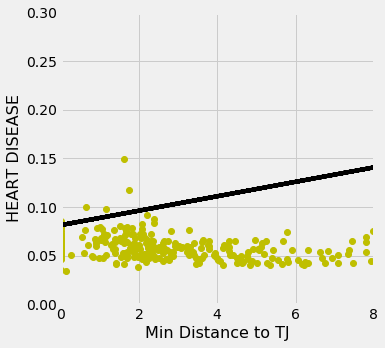

In [115]:
data.scatter("Min Distance to TJ", "HEART DISEASE")
heart_y = data.column("HEART DISEASE")
coef_heart = np.polyfit(x, heart_y, 1)
poly1d_fn_heart = np.poly1d(coef_heart)
plots.plot(x, heart_y, 'yo', x, poly1d_fn_heart(x), '--k')
matrix_heart = np.corrcoef(x, heart_y)
corr_xy_heart = matrix_heart[0, 1]
print("The Correlation Coefficient, r, is", corr_xy_heart)
r_squared_heart = corr_xy_heart ** 2
print("The R Squared Value is", r_squared_heart)
plots.axis([0, 8, 0, .3])

The Correlation Coefficient, r, is 0.08828017033905552
The R Squared Value is 0.007793388475092659


[0, 8, 0, 0.2]

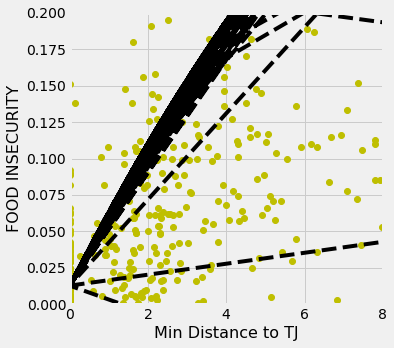

In [131]:
data.scatter("Min Distance to TJ", "FOOD INSECURITY")
food_y = data.column("FOOD INSECURITY")

#tried to do a different order polynomial and my graph didn't come out
coef_food = np.polyfit(x, food_y, np.math.log(10))
poly1d_fn_food = np.poly1d(coef_food)
plots.plot(x, food_y, 'yo', x, poly1d_fn_food(x), '--k')
matrix_food = np.corrcoef(x, food_y)
corr_xy_food = matrix_food[0, 1]
print("The Correlation Coefficient, r, is", corr_xy_food)
r_squared_food = corr_xy_food ** 2
print("The R Squared Value is", r_squared_food)
plots.axis([0, 8, 0, .2])

The Correlation Coefficient, r, is 0.04089733574587051
The R Squared Value is 0.0016725920711104579


[0, 8, 0, 0.8]

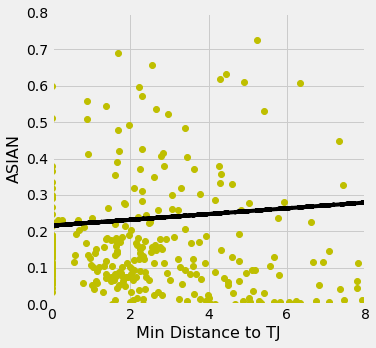

In [135]:
data.scatter("Min Distance to TJ", "ASIAN")
asian_y = data.column("ASIAN")
coef_asian = np.polyfit(x, asian_y, 1)
poly1d_fn_asian = np.poly1d(coef_asian)
plots.plot(x, asian_y, 'yo', x, poly1d_fn_asian(x), '--k')
matrix_asian = np.corrcoef(x, asian_y)
corr_xy_asian = matrix_asian[0, 1]
print("The Correlation Coefficient, r, is", corr_xy_asian)
r_squared_asian = corr_xy_asian ** 2
print("The R Squared Value is", r_squared_asian)
plots.axis([0, 8, 0, .8])

The Correlation Coefficient, r, is 0.07615479525861507
The R Squared Value is 0.005799552840881581


[0, 8, 0, 0.6]

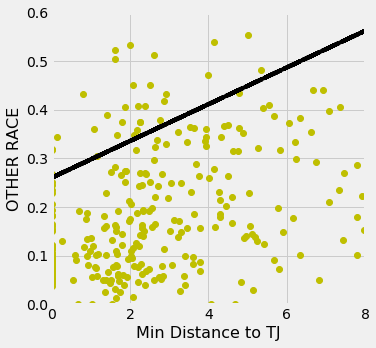

In [138]:
data.scatter("Min Distance to TJ", "OTHER RACE")
other_y = data.column("OTHER RACE")
coef_other = np.polyfit(x, other_y, 1)
poly1d_fn_other = np.poly1d(coef_other)
plots.plot(x, other_y, 'yo', x, poly1d_fn_other(x), '--k')
matrix_other = np.corrcoef(x, other_y)
corr_xy_other = matrix_other[0, 1]
print("The Correlation Coefficient, r, is", corr_xy_other)
r_squared_other = corr_xy_other ** 2
print("The R Squared Value is", r_squared_other)
plots.axis([0, 8, 0, .6])

In [100]:
#numpy_data = np.array([data.column("DIABETES")], [data.column("HEART DISEASE")], [data.column("POVERTY")], [data.column("FOOD INSECURITY")], [data.column("OBESE (BMI >=30)")], [data.column("WHITE")], [data.column("ASIAN")], [data.column("BLACK")], [data.column("OTHER RACE")], [data.column("Latitude")], [data.column("Longitude")], [data.column("Min Distance to TJ")])
#df = pd.DataFrame(data = numpy_data, index = [data.column("ZIP")], columns=["DIABETES", 'HEART DISEASE', 'POVERTY', 'FOOD INSECURITY', 'OBESE (BMI >=30)', 'WHITE', 'BLACK', 'ASIAN', 'OTHER RACE', 'Latitude', 'Longitude', 'Min Distance to TJ'] )